(Data de Entrega: 08/04  2º Feira)  
# Atividade Avaliativa

https://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf 

Pág. 121 -> 8 (fazer todo), 9 (até letra d), 10 (fazer todo), 13 (fazer todo) e 15 (fazer todo). 
_________________________________________________________________________________________________

#### 8. Esta questão envolve o uso de regressão linear simples no conjunto de dados [Auto].  

(a) Use a função lm() para executar uma regressão linear simples com mpg como a resposta e a horsepower 
como o preditor. 
         Use a função summary() para imprimir os resultados. Comente a saída.
Por exemplo:  

i. Existe uma relação entre o preditor e a resposta?

ii. Quão forte é a relação entre o preditor e a resposta?  

iii. A relação entre o preditor e a resposta é positiva ou negativa?  

iv. Qual é o mpg previsto associado a uma potência de 98? Quais são os intervalos de previsão e confiança 
de 95% associados?  

(b) Plote a resposta e o preditor. Use a função abline() para exibir a linha de regressão de mínimos quadrados. 

(c) Use a função plot() para produzir gráficos de diagnóstico do ajuste de regressão de mínimos quadrados.

Comente sobre quaisquer problemas que você vir com o ajuste. 

In [2]:
# install.packages("ISLR")
# install.packages("ggplot2")
# install.packages("GGally")
library(GGally)
library(ggplot2)
library(ISLR)

In [3]:
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [67]:
reg1=lm(mpg ~ horsepower, data = Auto)

In [68]:
reg1


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Coefficients:
(Intercept)   horsepower  
    39.9359      -0.1578  


Os resultados mostram o intercepto e o coeficiente beta para a variável horsepower

Interpretação da saída acima:

a equação da linha de regressão estimada pode ser escrita da seguinte forma: mpg = 39.94 + (-0.15*horsepower)

o intercepto(b0)é 39.94. Pode ser interpretado como a unidade de mpg(consumo de combustível) prevista para zero 
de horsepower. Lembre-se que estamos operando em unidades em milhas por galão. Isso significa que, para um intercepto
de horsepower(potência/cavalos) igual a zero,podemos esperar um consumo de combustível de 39.94 * 1.000 = 39.940.

In [69]:
# horsepower = preditor | mpg = resposta

In [70]:
summary(reg1)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


i) Existe sim uma relação entre o preditor e a resposta, pois o P-value é significativo. 

ii) A relação entre o preditor e a resposta é boa, pois explica 60 porcento do modelo todo.

iii) A relação é negativa, pois quanto mais horsepower (cavalo/potência) tiver menos mpg (gasto em consumo) obterá.

iv) O consumo de combustível em milhas (mpg) previsto a uma potência/cavalo de 98 será:
 

In [72]:
horsepower_98 = 98*-0.157845
mpg_98 = 39.935861
mpg_98 + horsepower_98

[1] 24.46705

a) Os intervalos de previsão e confiança de 95 porcento associados são:

In [73]:
confint(reg1, level= 0.90)

,5 %,95 %
(Intercept),38.7528707,41.1188513
horsepower,-0.1684719,-0.1472176


b) Plotando mpg e preditor:

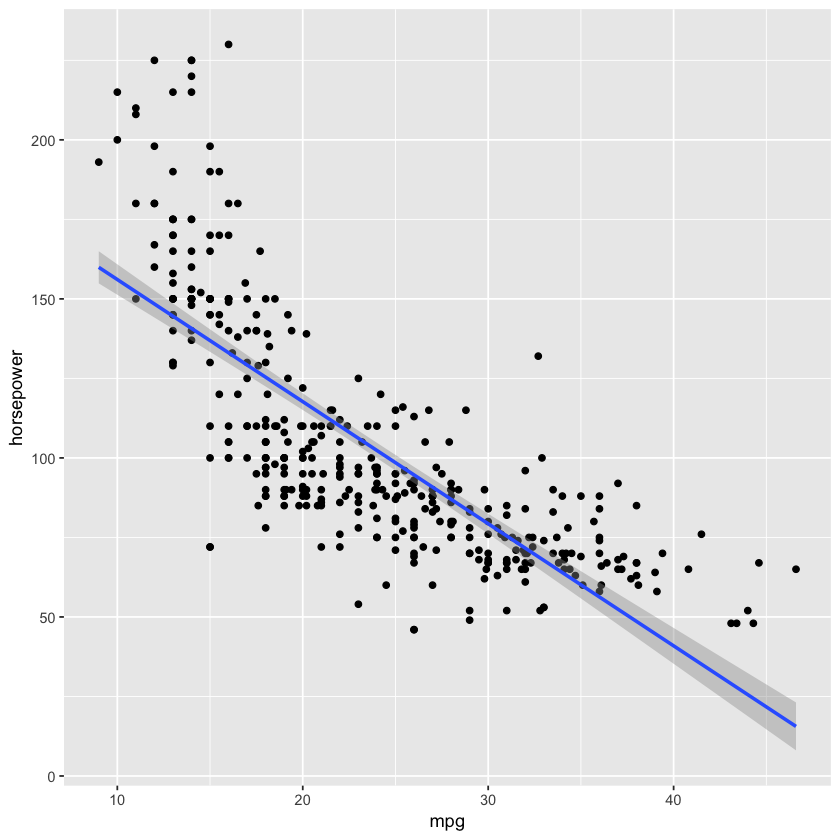

In [79]:
ggplot(Auto, aes(mpg,horsepower))+
  geom_point()+
  geom_smooth(method = "lm")

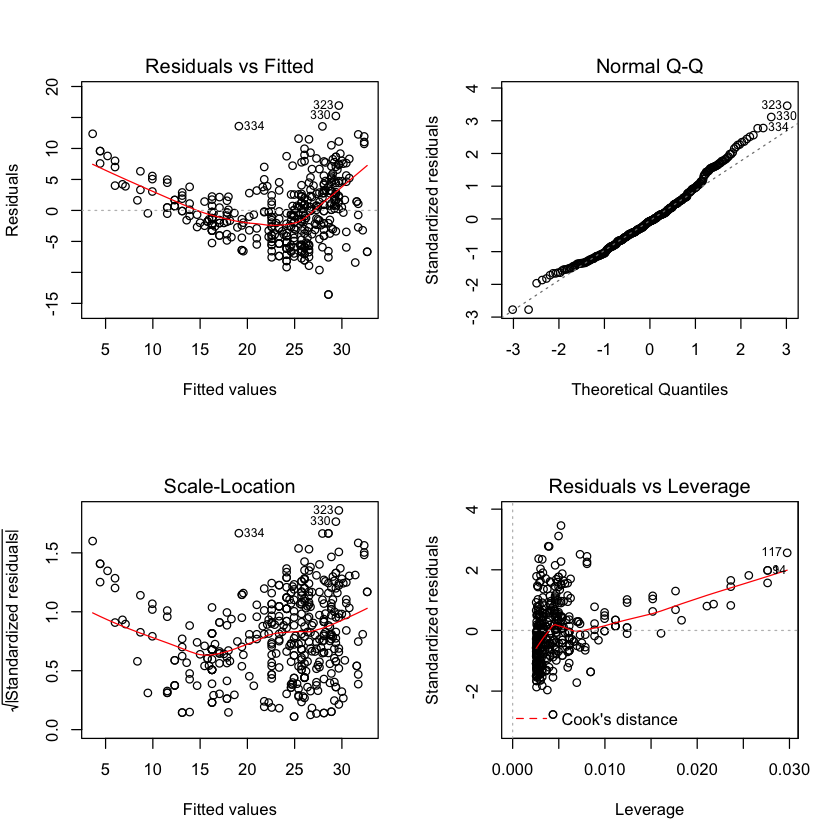

In [88]:
par(mfrow=c(2,2))
plot(reg1)

In [81]:
anova(reg1,reg2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
390,9385.916,NA,NA,NA,NA
389,7995.338,1,1390.578,67.65627,2.952662e-15


#### 9. Esta questão envolve o uso de regressão linear múltipla no conjunto de dados [Auto]. 

(a) Produza uma matriz de dispersão que inclua todas as variáveis no conjunto de dados. 

(b) Calcule a matriz de correlações entre as variáveis usando a função cor(). Você precisará excluir a variável de nome, cor(), que é qualitativa. 

(c) Use a função lm() para executar uma regressão linear múltipla com mpg como a resposta e todas as outras variáveis, exceto name como preditores. Use a função summary() para imprimir os resultados. Comente a saída.  

Por exemplo: 

i. Existe uma relação entre os preditores e a resposta?  

ii. Quais preditores parecem ter uma relação estatisticamente significativa com a resposta? 

iii. O que sugere o coeficiente da variável ano?  

(d) Use a função plot() para produzir gráficos diagnósticos do ajuste de regressão linear. Comente sobre quaisquer problemas que você vir com o ajuste. Os gráficos residuais sugerem algum valor atípico extraordinariamente grande? 
Faz o gráfico de alavancagem identifica quaisquer observações com alavancagem? 

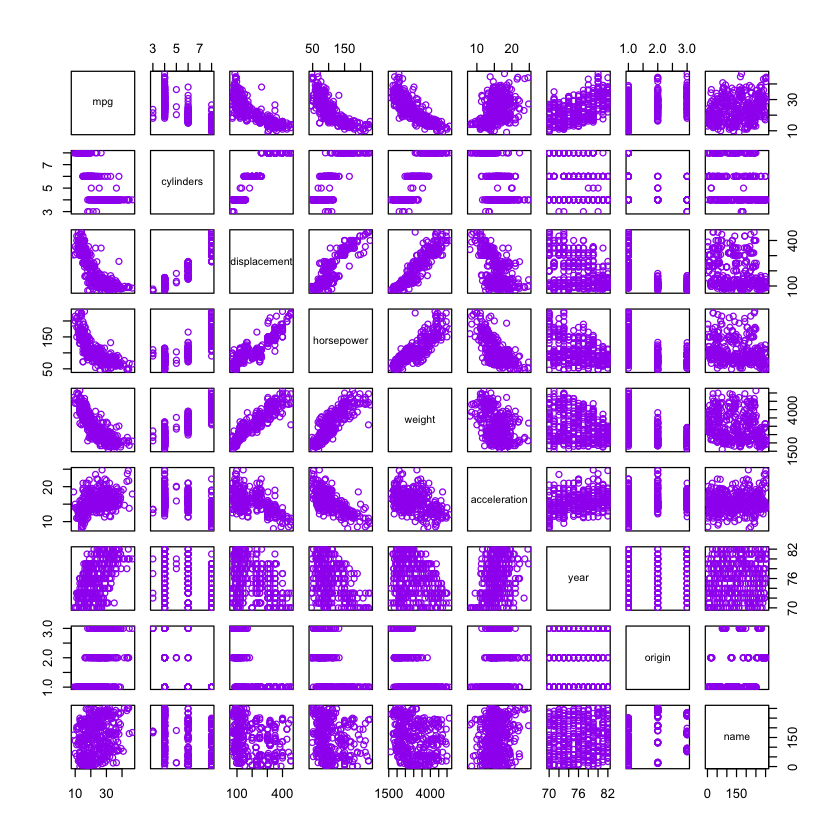

In [90]:
plot(Auto, col= "purple")

Warning message in ggcorr(Auto, label = T):
“data in column(s) 'name' are not numeric and were ignored”

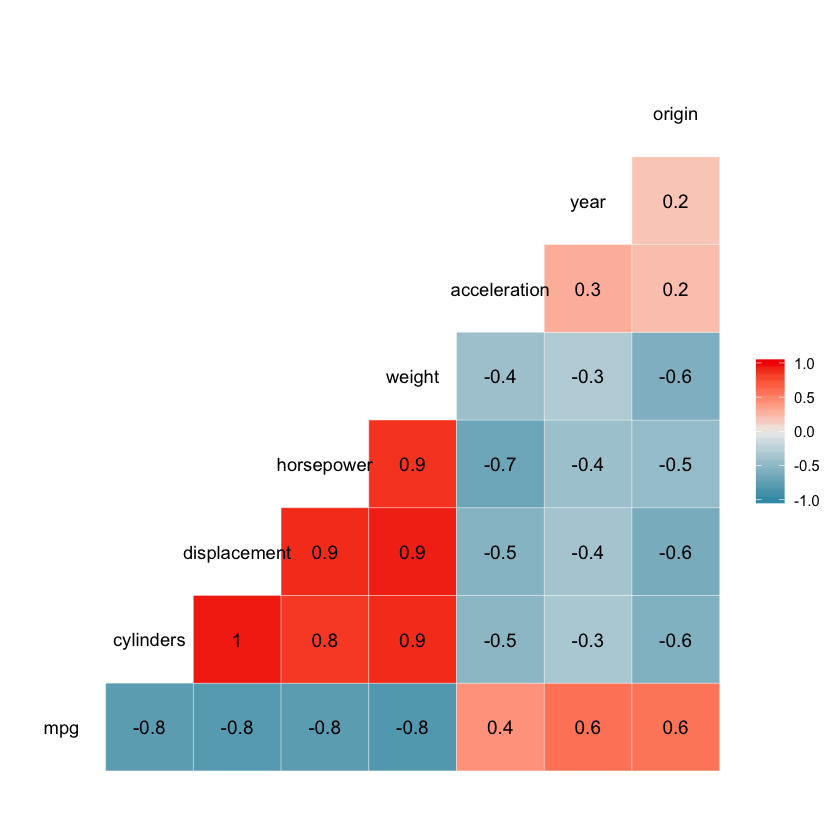

In [55]:
ggcorr(Auto, label=T)

In [58]:
reg2 = lm(mpg ~ horsepower + displacement, data = Auto)
summary(reg2)


Call:
lm(formula = mpg ~ horsepower + displacement, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.3674  -3.1721  -0.4338   2.3349  16.4288 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.469488   0.727716  51.489  < 2e-16 ***
horsepower   -0.058275   0.013491  -4.319 1.99e-05 ***
displacement -0.040818   0.004963  -8.225 2.95e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.534 on 389 degrees of freedom
Multiple R-squared:  0.6643,	Adjusted R-squared:  0.6626 
F-statistic: 384.9 on 2 and 389 DF,  p-value: < 2.2e-16
